In [2]:
import pyforest
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
# from autoviz.AutoViz_Class import AutoViz_Class
import seaborn as sns
import missingno as msno

import bs4 as bs
import requests

import scipy.stats as stats
import keras as ks
# import tensorflow as tf
import cv2 as cv

import re
import os
import datetime
import random
import time

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5, palette='plasma', font='Arial', rc={'figure.figsize':(8,6)})

In [3]:
import yfinance as yf


In [4]:
msft = yf.Ticker('MSFT') # Microsoft - MSFT Ticker symbol

In [6]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [7]:
type(msft.info)

dict

In [8]:
stock_info = msft.info

In [10]:
for key,value in stock_info.items():
    print(key,'->',value)

zip -> 98052-6399
sector -> Technology
fullTimeEmployees -> 181000
longBusinessSummary -> Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certification on Micr

In [12]:
# Name of the company
msft.info['longName']

'Microsoft Corporation'

In [13]:
msft.info['sharesOutstanding'] # Number of shares outstanding (commonly abbreviated as "shares")

7507979776

In [14]:
msft.info['recommendationMean'] # Mean of the company's recommendation

1.7

In [15]:
msft.splits # Split history of the company

Date
1987-09-21   2.00
1990-04-16   2.00
1991-06-27   1.50
1992-06-15   1.50
1994-05-23   2.00
1996-12-09   2.00
1998-02-23   2.00
1999-03-29   2.00
2003-02-18   2.00
Name: Stock Splits, dtype: float64

In [16]:
msft.dividends # Dividend history of the company

Date
2003-02-19   0.08
2003-10-15   0.16
2004-08-23   0.08
2004-11-15   3.08
2005-02-15   0.08
             ... 
2020-11-18   0.56
2021-02-17   0.56
2021-05-19   0.56
2021-08-18   0.56
2021-11-17   0.62
Name: Dividends, Length: 72, dtype: float64

In [17]:
msft.major_holders # Major holders of the company

,0,1
0,0.06%,% of Shares Held by All Insider
1,71.81%,% of Shares Held by Institutions
2,71.86%,% of Float Held by Institutions
3,5387,Number of Institutions Holding Shares


In [18]:
msft.institutional_holders # Institutional holders of the company

,Holder,Shares,Date Reported,% Out,Value
0,"Vanguard Group, Inc. (The)",613781686,2021-09-29,0.08,173037332917
1,Blackrock Inc.,507117032,2021-09-29,0.07,142966433661
2,State Street Corporation,294432926,2021-09-29,0.04,83006530497
3,"FMR, LLC",215731468,2021-09-29,0.03,60819015458
4,Price (T.Rowe) Associates Inc,197579453,2021-09-29,0.03,55701599389
5,"Geode Capital Management, LLC",126079812,2021-09-29,0.02,35544420599
6,Capital World Investors,110359787,2021-09-29,0.01,31112631151
7,Capital Research Global Investors,94282634,2021-09-29,0.01,26580160177
8,Capital International Investors,91901445,2021-09-29,0.01,25908855374
9,Northern Trust Corporation,89592127,2021-09-29,0.01,25257812443


In [22]:
df=msft.dividends

In [20]:
type(msft.dividends)

pandas.core.series.Series

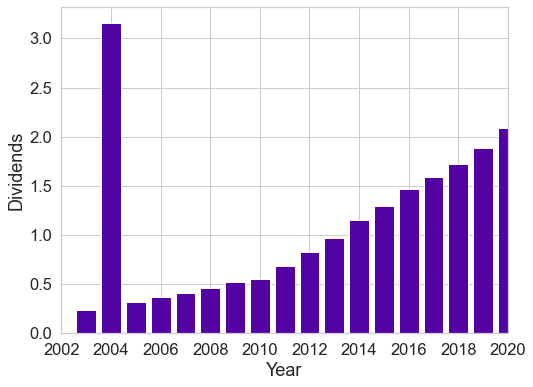

In [27]:
df = msft.dividends
df = df.resample('Y').sum()
df=df.reset_index()
df['Year'] = df['Date'].dt.year

plt.figure()
plt.bar(df['Year'],df['Dividends'])

plt.ylabel('Dividends')
plt.xlabel('Year')
plt.xlim(2002,2020)

plt.show()



In [28]:
# 2004?

In [29]:
msft.cashflow

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Investments,2876000000.00,6980000000.00,540000000.00,6557000000.00
Change To Liabilities,7431000000.00,5230000000.00,4694000000.00,7070000000.00
Total Cashflows From Investing Activities,-27577000000.00,-12223000000.00,-15773000000.00,-6061000000.00
Net Borrowings,-3750000000.00,-5518000000.00,-4000000000.00,-10201000000.00
Total Cash From Financing Activities,-48486000000.00,-46031000000.00,-36887000000.00,-33590000000.00
Change To Operating Activities,1160000000.00,-673000000.00,-1542000000.00,-459000000.00
Issuance Of Stock,1693000000.00,1343000000.00,1142000000.00,1002000000.00
Net Income,61271000000.00,44281000000.00,39240000000.00,16571000000.00
Change In Cash,648000000.00,2220000000.00,-590000000.00,4283000000.00
Repurchase Of Stock,-27385000000.00,-22968000000.00,-19543000000.00,-10721000000.00


In [30]:
msft.balance_sheet

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Intangible Assets,7800000000.00,7038000000.00,7750000000.00,8053000000.00
Total Liab,191791000000.00,183007000000.00,184226000000.00,176130000000.00
Total Stockholder Equity,141988000000.00,118304000000.00,102330000000.00,82718000000.00
Other Current Liab,52612000000.00,46001000000.00,45860000000.00,38195000000.00
Total Assets,333779000000.00,301311000000.00,286556000000.00,258848000000.00
Common Stock,83111000000.00,80552000000.00,78520000000.00,71223000000.00
Other Current Assets,13471000000.00,11517000000.00,10133000000.00,6855000000.00
Retained Earnings,57055000000.00,34566000000.00,24150000000.00,13682000000.00
Other Liab,31681000000.00,34492000000.00,35699000000.00,35707000000.00
Good Will,49711000000.00,43351000000.00,42026000000.00,35683000000.00


In [32]:
df = msft.history(period='max')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.06,0.06,0.06,0.06,1031788800,0.00,0.00
1986-03-14,0.06,0.06,0.06,0.06,308160000,0.00,0.00
1986-03-17,0.06,0.07,0.06,0.06,133171200,0.00,0.00
1986-03-18,0.06,0.07,0.06,0.06,67766400,0.00,0.00
1986-03-19,0.06,0.06,0.06,0.06,47894400,0.00,0.00


In [35]:
cols = df.columns
cols

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

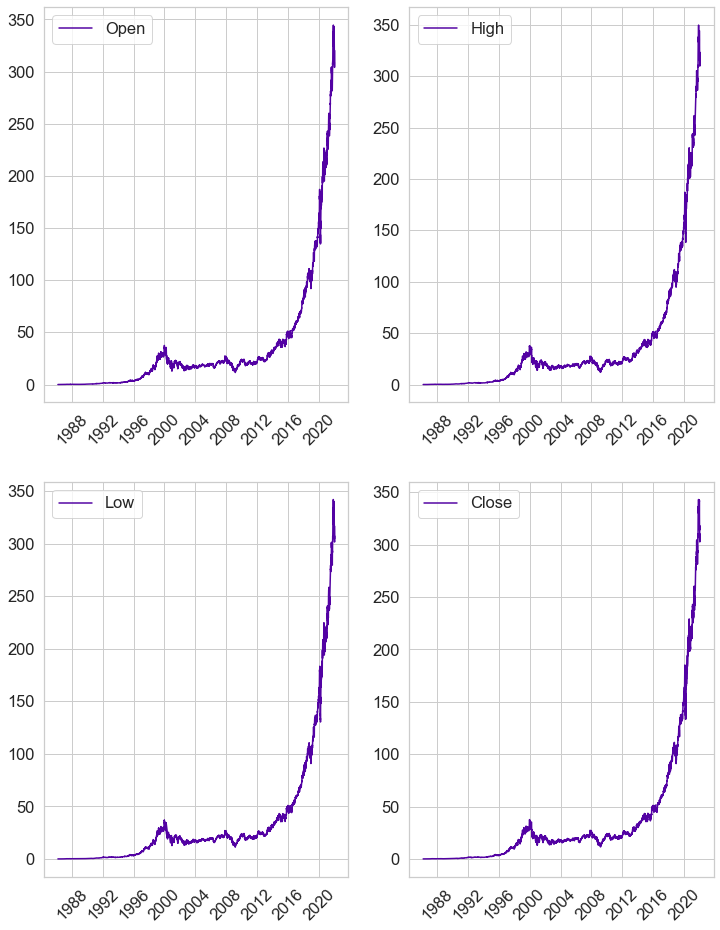

In [38]:
# Plotting open, high, low, close
plt.figure(figsize=(12,16))

plt.subplot(2,2,1)
plt.plot(df['Open'],label='Open')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,2,2)
plt.plot(df['High'],label='High')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,2,3)
plt.plot(df['Low'],label='Low')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2,2,4)
plt.plot(df['Close'],label='Close')
plt.xticks(rotation=45)
plt.legend()


In [42]:
securities = ['voo','msft','aapl','tsla','nvda','jnj','axp','dis']

df = pd.DataFrame()

for security in securities:
    df[security] = yf.Ticker(security).history(period='max')['Close']

In [43]:
df

,voo,msft,aapl,tsla,nvda,jnj,axp,dis
Date,,,,,,,,
2010-09-09,81.35,18.82,8.06,4.14,2.34,43.14,34.40,29.68
2010-09-10,81.72,18.69,8.07,4.03,2.31,43.25,33.98,29.75
2010-09-13,82.75,19.68,8.18,4.14,2.44,43.50,34.85,29.85
2010-09-14,82.73,19.61,8.21,4.22,2.42,43.69,34.14,29.66
2010-09-15,82.94,19.69,8.27,4.40,2.43,44.03,34.54,29.80
...,...,...,...,...,...,...,...,...
2022-01-13,427.10,304.80,172.19,1031.56,265.75,168.76,173.29,155.44
2022-01-14,427.23,310.20,173.07,1049.61,269.42,167.84,168.40,151.94
2022-01-18,419.74,302.65,169.80,1030.51,259.03,167.10,166.17,152.27


<AxesSubplot:xlabel='Date'>

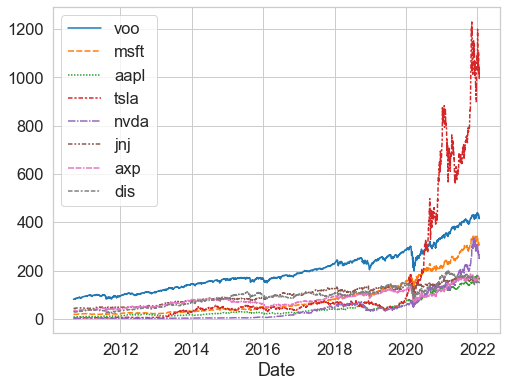

In [45]:
sns.lineplot(data=df, palette='tab10')